Markets Are Always Switching Between Trending And Mean Reverting States

Humans Can't Easily Discern Which State A Market Is Presently In

Hopefully Our Models Can

In [ ]:
#Load our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read in the data
data = pd.read_csv("ENTER/YOUR/FILE/PATH/HERE")
data = data.iloc[:-(365 * 5),:5]
data

Time     Open     High      Low    Close
0     2015.08.14 00:00:00  1114.69  1121.00  1111.72  1114.91
1     2015.08.16 00:00:00  1113.96  1114.85  1113.49  1114.37
2     2015.08.17 00:00:00  1114.37  1122.78  1113.88  1117.07
3     2015.08.18 00:00:00  1117.08  1121.12  1109.59  1117.47
4     2015.08.19 00:00:00  1117.52  1134.56  1116.21  1132.83
...                   ...      ...      ...      ...      ...
1169  2019.06.10 00:00:00  1335.08  1337.72  1325.09  1329.25
1170  2019.06.11 00:00:00  1329.26  1329.87  1319.87  1327.78
1171  2019.06.12 00:00:00  1327.77  1338.36  1326.02  1333.58
1172  2019.06.13 00:00:00  1333.58  1344.60  1332.39  1344.48
1173  2019.06.14 00:00:00  1344.47  1358.12  1337.72  1341.26

[1174 rows x 5 columns]

In [ ]:
HORIZON = 10

In [ ]:
#Even if your data is just simple OHLC price feeds, you CAN still reproduce the results in the article
#What's the growth between the open and the High?
data['O-H'] = data['Open'] - data['High']

#What's the growth between the open and the Low?
data['O-L'] = data['Open'] - data['Low']

#What's the growth between the open and the Close?
data['O-C'] = data['Open'] - data['Close']

#What's the growth between the high and the low?
data['H-L'] = data['High'] - data['Low']

#What's the growth between the high and the close?
data['H-C'] = data['High'] - data['Close']

#What's the growth between the low and the close?
data['L-C'] = data['Low'] - data['Close']

#How much as the opening price been growing?
data['Delta O'] = data['Open'] - data['Open'].shift(HORIZON)

#How much as the low price been growing?
data['Delta L'] = data['Low'] - data['Low'].shift(HORIZON)

#How much as the High price been growing?
data['Delta H'] = data['High'] - data['High'].shift(HORIZON)

#How much as the Close price been growing?
data['Delta C'] = data['Close'] - data['Close'].shift(HORIZON)

data = data.iloc[HORIZON:,:]

data

Time     Open     High      Low    Close    O-H    O-L  \
10    2015.08.26 00:00:00  1143.32  1146.44  1117.65  1123.33  -3.12  25.67   
11    2015.08.27 00:00:00  1123.45  1129.26  1118.10  1125.96  -5.81   5.35   
12    2015.08.28 00:00:00  1125.96  1140.78  1123.73  1134.05 -14.82   2.23   
13    2015.08.30 00:00:00  1133.24  1134.27  1132.47  1132.47  -1.03   0.77   
14    2015.08.31 00:00:00  1132.48  1136.63  1125.60  1135.30  -4.15   6.88   
...                   ...      ...      ...      ...      ...    ...    ...   
1169  2019.06.10 00:00:00  1335.08  1337.72  1325.09  1329.25  -2.64   9.99   
1170  2019.06.11 00:00:00  1329.26  1329.87  1319.87  1327.78  -0.61   9.39   
1171  2019.06.12 00:00:00  1327.77  1338.36  1326.02  1333.58 -10.59   1.75   
1172  2019.06.13 00:00:00  1333.58  1344.60  1332.39  1344.48 -11.02   1.19   
1173  2019.06.14 00:00:00  1344.47  1358.12  1337.72  1341.26 -13.65   6.75   

        O-C    H-L    H-C    L-C  Delta O  Delta L  Delta H  Delta C  
10    19.99  28.79  23.11  -5.68    28.63     5.93    25.44     8.42  
11    -2.51  11.16   3.30  -7.86     9.49     4.61    14.41    11.59  
12    -8.09  17.05   6.73 -10.32    11.59     9.85    18.00    16.98  
13     0.77   1.80   1.80   0.00    16.16    22.88    13.15    15.00  
14    -2.82  11.03   1.33  -9.70    14.96     9.39     2.07     2.47  
...     ...    ...    ...    ...      ...      ...      ...      ...  
1169   5.83  12.63   8.47  -4.16    55.26    46.01    52.17    49.36  
1170   1.48  10.00   2.09  -7.91    49.30    44.84    39.27    37.30  
1171  -5.81  12.34   4.78  -7.56    37.30    35.64    31.48    28.44  
1172 -10.90  12.21   0.12 -12.09    26.89    25.90    35.16    35.04  
1173   3.21  20.40  16.86  -3.54    35.04    29.23    30.17    16.11  

[1164 rows x 15 columns]

In [ ]:
#Calculate the returns generated by the market
data['Return'] = data['Close'].shift(-HORIZON) - data['Close']

#Drop the last horizon rows
data = data.iloc[:-HORIZON,:]

data

<ipython-input-128-18e9ccb6f3d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Close'].shift(-HORIZON) - data['Close']


Time     Open     High      Low    Close    O-H    O-L  \
10    2015.08.26 00:00:00  1143.32  1146.44  1117.65  1123.33  -3.12  25.67   
11    2015.08.27 00:00:00  1123.45  1129.26  1118.10  1125.96  -5.81   5.35   
12    2015.08.28 00:00:00  1125.96  1140.78  1123.73  1134.05 -14.82   2.23   
13    2015.08.30 00:00:00  1133.24  1134.27  1132.47  1132.47  -1.03   0.77   
14    2015.08.31 00:00:00  1132.48  1136.63  1125.60  1135.30  -4.15   6.88   
...                   ...      ...      ...      ...      ...    ...    ...   
1159  2019.05.29 00:00:00  1279.82  1285.55  1279.08  1279.89  -5.73   0.74   
1160  2019.05.30 00:00:00  1279.96  1290.60  1275.03  1290.48 -10.64   4.93   
1161  2019.05.31 00:00:00  1290.47  1306.88  1290.38  1305.14 -16.41   0.09   
1162  2019.06.02 00:00:00  1306.69  1309.44  1306.49  1309.44  -2.75   0.20   
1163  2019.06.03 00:00:00  1309.43  1327.95  1308.49  1325.15 -18.52   0.94   

        O-C    H-L    H-C    L-C  Delta O  Delta L  Delta H  Delta C  Return  
10    19.99  28.79  23.11  -5.68    28.63     5.93    25.44     8.42   -3.24  
11    -2.51  11.16   3.30  -7.86     9.49     4.61    14.41    11.59   -3.70  
12    -8.09  17.05   6.73 -10.32    11.59     9.85    18.00    16.98  -27.00  
13     0.77   1.80   1.80   0.00    16.16    22.88    13.15    15.00  -20.70  
14    -2.82  11.03   1.33  -9.70    14.96     9.39     2.07     2.47  -27.68  
...     ...    ...    ...    ...      ...      ...      ...      ...     ...  
1159  -0.07   6.47   5.66  -0.81    -6.01     4.25    -3.39     2.24   49.36  
1160 -10.52  15.57   0.12 -15.45     1.66    -1.91    11.76    12.72   37.30  
1161 -14.67  16.50   1.74 -14.76    12.80    16.71    27.83    27.73   28.44  
1162  -2.75   2.95   0.00  -2.95    29.30    36.94    32.05    34.79   35.04  
1163 -15.72  19.46   2.80 -16.66    34.78    35.99    50.64    50.90   16.11  

[1154 rows x 16 columns]

In [ ]:
#Now let us define the signals being generated by the moving average, in the DRS framework there are always at least n signals depending on the n states the market could be in
#Our simple DRS model assumes only 2 states
#First we will define the actions you should take assuming the market is in a trending state
#Therefore if price crosses above the moving average, buy. Otherwise, sell.
data['Trend Action'] = 0

data.loc[data['Delta C'] > 0, 'Trend Action'] = 1
data.loc[data['Delta C'] < 0, 'Trend Action'] = -1

#Now calculate the returns generated by the strategy
data['Trend Profit'] = data['Trend Action'] * data['Return']

data

<ipython-input-129-f0af066dcb75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend Action'] = 0
<ipython-input-129-f0af066dcb75>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend Profit'] = data['Trend Action'] * data['Return']


Time     Open     High      Low    Close    O-H    O-L  \
10    2015.08.26 00:00:00  1143.32  1146.44  1117.65  1123.33  -3.12  25.67   
11    2015.08.27 00:00:00  1123.45  1129.26  1118.10  1125.96  -5.81   5.35   
12    2015.08.28 00:00:00  1125.96  1140.78  1123.73  1134.05 -14.82   2.23   
13    2015.08.30 00:00:00  1133.24  1134.27  1132.47  1132.47  -1.03   0.77   
14    2015.08.31 00:00:00  1132.48  1136.63  1125.60  1135.30  -4.15   6.88   
...                   ...      ...      ...      ...      ...    ...    ...   
1159  2019.05.29 00:00:00  1279.82  1285.55  1279.08  1279.89  -5.73   0.74   
1160  2019.05.30 00:00:00  1279.96  1290.60  1275.03  1290.48 -10.64   4.93   
1161  2019.05.31 00:00:00  1290.47  1306.88  1290.38  1305.14 -16.41   0.09   
1162  2019.06.02 00:00:00  1306.69  1309.44  1306.49  1309.44  -2.75   0.20   
1163  2019.06.03 00:00:00  1309.43  1327.95  1308.49  1325.15 -18.52   0.94   

        O-C    H-L    H-C    L-C  Delta O  Delta L  Delta H  Delta C  Return  \
10    19.99  28.79  23.11  -5.68    28.63     5.93    25.44     8.42   -3.24   
11    -2.51  11.16   3.30  -7.86     9.49     4.61    14.41    11.59   -3.70   
12    -8.09  17.05   6.73 -10.32    11.59     9.85    18.00    16.98  -27.00   
13     0.77   1.80   1.80   0.00    16.16    22.88    13.15    15.00  -20.70   
14    -2.82  11.03   1.33  -9.70    14.96     9.39     2.07     2.47  -27.68   
...     ...    ...    ...    ...      ...      ...      ...      ...     ...   
1159  -0.07   6.47   5.66  -0.81    -6.01     4.25    -3.39     2.24   49.36   
1160 -10.52  15.57   0.12 -15.45     1.66    -1.91    11.76    12.72   37.30   
1161 -14.67  16.50   1.74 -14.76    12.80    16.71    27.83    27.73   28.44   
1162  -2.75   2.95   0.00  -2.95    29.30    36.94    32.05    34.79   35.04   
1163 -15.72  19.46   2.80 -16.66    34.78    35.99    50.64    50.90   16.11   

      Trend Action  Trend Profit  
10               1         -3.24  
11               1         -3.70  
12               1        -27.00  
13               1        -20.70  
14               1        -27.68  
...            ...           ...  
1159             1         49.36  
1160             1         37.30  
1161             1         28.44  
1162             1         35.04  
1163             1         16.11  

[1154 rows x 18 columns]

In [ ]:
#Now we will repeat the procedure assuming the market was mean reverting
data['Mean Reverting Action'] = 0

data.loc[data['Delta C'] > 0, 'Mean Reverting Action'] = -1
data.loc[data['Delta C'] < 0, 'Mean Reverting Action'] = 1

#Now calculate the returns generated by the strategy
data['Mean Reverting Profit'] = data['Mean Reverting Action'] * data['Return']

data

<ipython-input-130-9a5eec9acd41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mean Reverting Action'] = 0
<ipython-input-130-9a5eec9acd41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mean Reverting Profit'] = data['Mean Reverting Action'] * data['Return']


Time     Open     High      Low    Close    O-H    O-L  \
10    2015.08.26 00:00:00  1143.32  1146.44  1117.65  1123.33  -3.12  25.67   
11    2015.08.27 00:00:00  1123.45  1129.26  1118.10  1125.96  -5.81   5.35   
12    2015.08.28 00:00:00  1125.96  1140.78  1123.73  1134.05 -14.82   2.23   
13    2015.08.30 00:00:00  1133.24  1134.27  1132.47  1132.47  -1.03   0.77   
14    2015.08.31 00:00:00  1132.48  1136.63  1125.60  1135.30  -4.15   6.88   
...                   ...      ...      ...      ...      ...    ...    ...   
1159  2019.05.29 00:00:00  1279.82  1285.55  1279.08  1279.89  -5.73   0.74   
1160  2019.05.30 00:00:00  1279.96  1290.60  1275.03  1290.48 -10.64   4.93   
1161  2019.05.31 00:00:00  1290.47  1306.88  1290.38  1305.14 -16.41   0.09   
1162  2019.06.02 00:00:00  1306.69  1309.44  1306.49  1309.44  -2.75   0.20   
1163  2019.06.03 00:00:00  1309.43  1327.95  1308.49  1325.15 -18.52   0.94   

        O-C    H-L    H-C    L-C  Delta O  Delta L  Delta H  Delta C  Return  \
10    19.99  28.79  23.11  -5.68    28.63     5.93    25.44     8.42   -3.24   
11    -2.51  11.16   3.30  -7.86     9.49     4.61    14.41    11.59   -3.70   
12    -8.09  17.05   6.73 -10.32    11.59     9.85    18.00    16.98  -27.00   
13     0.77   1.80   1.80   0.00    16.16    22.88    13.15    15.00  -20.70   
14    -2.82  11.03   1.33  -9.70    14.96     9.39     2.07     2.47  -27.68   
...     ...    ...    ...    ...      ...      ...      ...      ...     ...   
1159  -0.07   6.47   5.66  -0.81    -6.01     4.25    -3.39     2.24   49.36   
1160 -10.52  15.57   0.12 -15.45     1.66    -1.91    11.76    12.72   37.30   
1161 -14.67  16.50   1.74 -14.76    12.80    16.71    27.83    27.73   28.44   
1162  -2.75   2.95   0.00  -2.95    29.30    36.94    32.05    34.79   35.04   
1163 -15.72  19.46   2.80 -16.66    34.78    35.99    50.64    50.90   16.11   

      Trend Action  Trend Profit  Mean Reverting Action  Mean Reverting Profit  
10               1         -3.24                     -1                   3.24  
11               1         -3.70                     -1                   3.70  
12               1        -27.00                     -1                  27.00  
13               1        -20.70                     -1                  20.70  
14               1        -27.68                     -1                  27.68  
...            ...           ...                    ...                    ...  
1159             1         49.36                     -1                 -49.36  
1160             1         37.30                     -1                 -37.30  
1161             1         28.44                     -1                 -28.44  
1162             1         35.04                     -1                 -35.04  
1163             1         16.11                     -1                 -16.11  

[1154 rows x 20 columns]

Whichever action produces positive rewards, was alligned with the true state of the market.

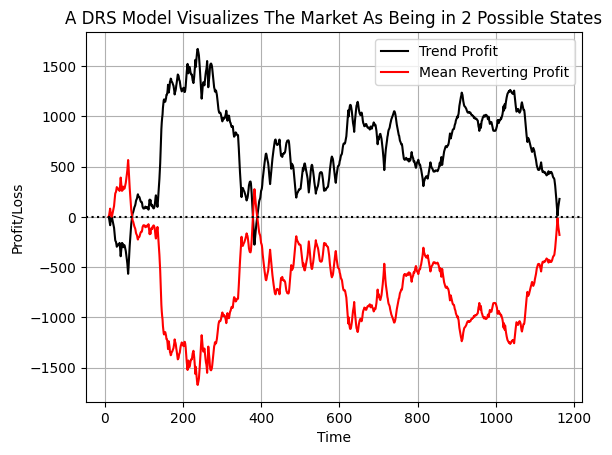

In [ ]:
#If we plot our cumulative profit sums, we can see the profit and losses aren't evenly distributed between the two states
plt.plot(data['Trend Profit'].cumsum(),color='black')
plt.plot(data['Mean Reverting Profit'].cumsum(),color='red')

#The mean reverting strategy appears to have been making outsized profits with respect to the trending stratetefgy
#However, closer inspection reveals, that both strategies are profitable, but never at the same time!
#The profit profiles of both strategies show abrupt shocks, when the opposite strategy become more profitable.
plt.legend(['Trend Profit','Mean Reverting Profit'])
plt.xlabel('Time')
plt.ylabel('Profit/Loss')
plt.title('A DRS Model Visualizes The Market As Being in 2 Possible States')
plt.grid()
plt.axhline(0,color='black',linestyle=':')

The model we are building today is intended to learn these abrupt shocks and help us anticipate them. It should help us decide when to switch states and when to stay put. Tasks that aren't intuitive.

In [ ]:
#Let's define the inputs and target
X = data.iloc[:,2:-5].columns
y = ['Trend Profit','Mean Reverting Profit']

In [ ]:
#Import the modelling tools
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Split the data
train , test = train_test_split(data,test_size=0.5,shuffle=False)

In [ ]:
train

Time     Open     High      Low    Close    O-H    O-L  \
10   2015.08.26 00:00:00  1143.32  1146.44  1117.65  1123.33  -3.12  25.67   
11   2015.08.27 00:00:00  1123.45  1129.26  1118.10  1125.96  -5.81   5.35   
12   2015.08.28 00:00:00  1125.96  1140.78  1123.73  1134.05 -14.82   2.23   
13   2015.08.30 00:00:00  1133.24  1134.27  1132.47  1132.47  -1.03   0.77   
14   2015.08.31 00:00:00  1132.48  1136.63  1125.60  1135.30  -4.15   6.88   
..                   ...      ...      ...      ...      ...    ...    ...   
582  2017.07.03 00:00:00  1241.62  1241.96  1219.36  1219.52  -0.34  22.26   
583  2017.07.05 00:00:00  1220.00  1227.60  1217.38  1227.20  -7.60   2.62   
584  2017.07.06 00:00:00  1227.20  1228.34  1222.45  1224.81  -1.14   4.75   
585  2017.07.07 00:00:00  1224.91  1226.08  1209.21  1209.21  -1.17  15.70   
586  2017.07.09 00:00:00  1212.98  1213.72  1211.43  1212.97  -0.74   1.55   

       O-C    H-L    H-C    L-C  Delta O  Delta L  Delta H  Delta C  Return  \
10   19.99  28.79  23.11  -5.68    28.63     5.93    25.44     8.42   -3.24   
11   -2.51  11.16   3.30  -7.86     9.49     4.61    14.41    11.59   -3.70   
12   -8.09  17.05   6.73 -10.32    11.59     9.85    18.00    16.98  -27.00   
13    0.77   1.80   1.80   0.00    16.16    22.88    13.15    15.00  -20.70   
14   -2.82  11.03   1.33  -9.70    14.96     9.39     2.07     2.47  -27.68   
..     ...    ...    ...    ...      ...      ...      ...      ...     ...   
582  22.10  22.60  22.44  -0.16    -3.06   -21.42    -5.80   -27.05   10.53   
583  -7.20  10.22   0.40  -9.82   -26.63   -29.24   -24.59   -24.90    7.06   
584   2.39   5.89   3.53  -2.36   -24.92   -27.31   -28.42   -31.80   17.37   
585  15.70  16.87  16.87   0.00   -32.79   -47.66   -31.95   -47.78   32.28   
586   0.01   2.29   0.75  -1.54   -43.99   -41.39   -44.18   -39.85   31.37   

     Trend Action  Trend Profit  Mean Reverting Action  Mean Reverting Profit  
10              1         -3.24                     -1                   3.24  
11              1         -3.70                     -1                   3.70  
12              1        -27.00                     -1                  27.00  
13              1        -20.70                     -1                  20.70  
14              1        -27.68                     -1                  27.68  
..            ...           ...                    ...                    ...  
582            -1        -10.53                      1                  10.53  
583            -1         -7.06                      1                   7.06  
584            -1        -17.37                      1                  17.37  
585            -1        -32.28                      1                  32.28  
586            -1        -31.37                      1                  31.37  

[577 rows x 20 columns]

In [ ]:
f_train , f_validation = train_test_split(train,test_size=0.5,shuffle=False)

In [ ]:
#The trend model
trend_model = RandomForestRegressor(random_state=0)

In [ ]:
#The mean reverting model
mean_model = RandomForestRegressor(random_state=0)

In [ ]:
trend_model.fit(f_train.loc[:,X],f_train.loc[:,y[0]])
mean_model.fit(f_train.loc[:,X],f_train.loc[:,y[1]])

RandomForestRegressor(random_state=0)

In [ ]:
pred_1 = trend_model.predict(f_validation.loc[:,X])
pred_2 = mean_model.predict(f_validation.loc[:,X])

In [ ]:
test_result = pred_1 + pred_2

print(f" Test Passed: {np.linalg.norm(test_result,ord=2) == 0.0}")

 Test Passed: True


In [ ]:
test_result

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
f_validation = f_validation.reset_index(drop=True)

Text(0.5, 1.0, 'Visualizing Our Model Performance Out Of Sample on the EURUSD 10 Day Return')

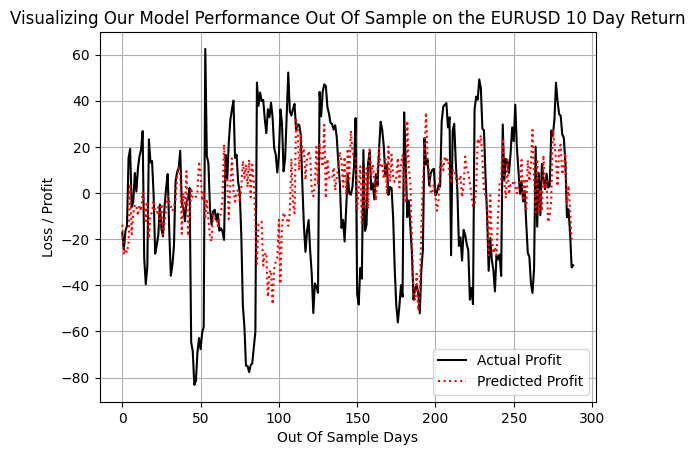

In [ ]:
plt.plot(f_validation.loc[:,y[0]],color='black')
plt.plot(pred_1,color='red',linestyle=':')
plt.legend(['Actual Profit','Predicted Profit'])
plt.grid()
plt.ylabel('Loss / Profit')
plt.xlabel('Out Of Sample Days')
plt.title('Visualizing Our Model Performance Out Of Sample on the EURUSD 10 Day Return')

Text(0.5, 1.0, 'Visualizing Our Model Performance Out Of Sample on the EURUSD 10 Day Return')

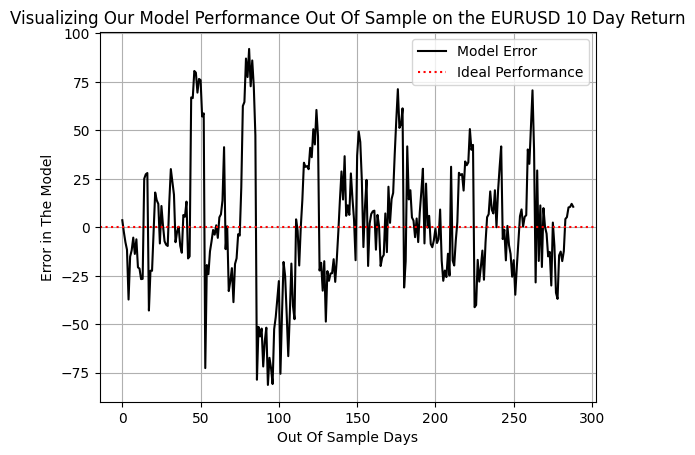

In [ ]:
plt.plot(f_validation.loc[:,y[1]]-pred_2,color='black')
plt.axhline(0,color='red',linestyle=':')
plt.legend(['Model Error','Ideal Performance'])
plt.grid()
plt.ylabel('Error in The Model')
plt.xlabel('Out Of Sample Days')
plt.title('Visualizing Our Model Performance Out Of Sample on the EURUSD 10 Day Return')

In [ ]:
!pip install skl2onnx onnx

In [ ]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [ ]:
eurusd_drs_shape = [("float_input",FloatTensorType([1,len(X)]))]
eurusd_drs_output_shape = [("float_output",FloatTensorType([1,1]))]

In [ ]:
trend_model = RandomForestRegressor(random_state=0)
mean_model = RandomForestRegressor(random_state=0)

trend_model.fit(data.loc[:,X],data.loc[:,y[0]])
mean_model.fit(data.loc[:,X],data.loc[:,y[1]])

RandomForestRegressor(random_state=0)

In [ ]:
trend_drs_model_proto = convert_sklearn(trend_model,initial_types=eurusd_drs_shape,final_types=eurusd_drs_output_shape,target_opset=12)
mean_drs_model_proto = convert_sklearn(mean_model,initial_types=eurusd_drs_shape,final_types=eurusd_drs_output_shape,target_opset=12)

In [ ]:
onnx.save(trend_drs_model_proto,"XAUUSD RF D1 T DRS.onnx")
onnx.save(mean_drs_model_proto,"XAUUSD RF D1 M DRS.onnx")

In [ ]:
len(X)

14

In [ ]:
X

Index(['Open', 'High', 'Low', 'Close', 'O-H', 'O-L', 'O-C', 'H-L', 'H-C',
       'L-C', 'Delta O', 'Delta L', 'Delta H', 'Delta C'],
      dtype='object')